In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

In [3]:
df = pd.read_csv(r"/content/housing.csv");

In [4]:
print(df.head(10))

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   
7    -122.25     37.84                52.0       3104.0           687.0   
8    -122.26     37.84                42.0       2555.0           665.0   
9    -122.25     37.84                52.0       3549.0           707.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0   

In [5]:
#selct features
features = df[['total_rooms', 'total_bedrooms','median_income']]
target = df['median_house_value']

In [6]:
#handle missing values
features = features.fillna(features.mean());

In [8]:
#split the data
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=42);

In [9]:
#train the model
model = LinearRegression();
model.fit(X_train,y_train);

In [10]:
#make predictions
predictions = model.predict(X_test);

In [11]:
#evaluations
print("\n Evaluations : \n ")
print("R2: ",r2_score(y_test,predictions))
print("\n MAE : ",mean_absolute_error(y_test,predictions))
print("\n coefficient: ",model.coef_)
print("\nIntercept:", model.intercept_)


 Evaluations : 
 
R2:  0.478063303342927

 MAE :  61063.33396524467

 coefficient:  [-3.11496418e+01  1.65717962e+02  4.93199375e+04]

Intercept: 8855.03839959993


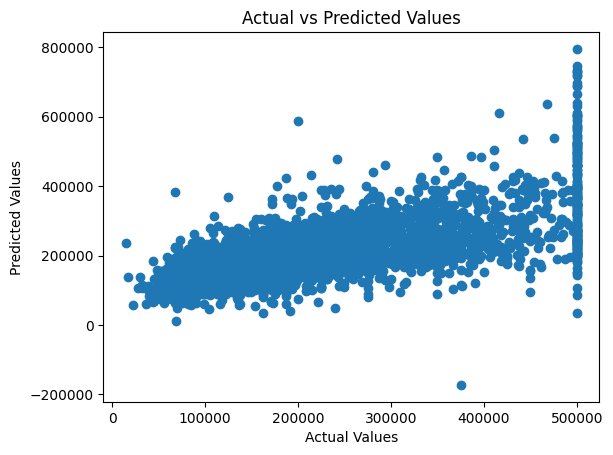

In [12]:
#visualization
plt.figure()
plt.scatter(y_test,predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

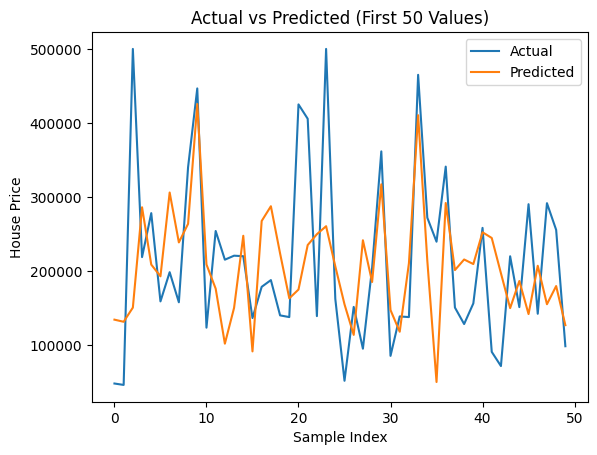

In [13]:
# B. Line Plot: Predicted vs Actual (Small sample for cleaner view)
plt.figure()
plt.plot(y_test.iloc[:50].values, label="Actual")
plt.plot(predictions[:50], label="Predicted")
plt.xlabel("Sample Index")
plt.ylabel("House Price")
plt.title("Actual vs Predicted (First 50 Values)")
plt.legend()
plt.show()